In [13]:
from mlxtend.data import loadlocal_mnist
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd

#df = pd.read_csv('data.csv') Your file path should be in quotations Here's a cool/lazy trick using the terminal...

df = pd.read_csv('/Users/ednovate/austin_police_data/austin_data.csv')


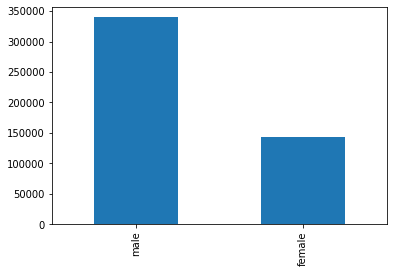

In [14]:

## For categorical variables

# name_of_data_frame['column_name'].value_counts.plot(kind = 'bar')

df['subject_sex'].value_counts().plot(kind='bar')


In [ ]:
## Make some barplots of your own! Screen shot and send me any ones that you would like to project and talk about with the class.




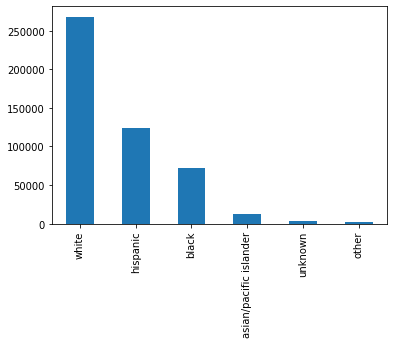

In [15]:
# bar plots with numeric data

df['subject_race'].value_counts().plot(kind = 'bar')


In [16]:
#Does this tell the whole story? Why or why not? 
# How can we tell if the amount of traffic stops is disproportionate to the population?


df['subject_race'].value_counts()


white                     268058
hispanic                  123943
black                      72324
asian/pacific islander     13167
unknown                     3135
other                       2626
Name: subject_race, dtype: int64

In [17]:

stop_vector  = df['subject_race'].value_counts(normalize = 'true')


stop_vector


white                     0.554695
hispanic                  0.256476
black                     0.149661
asian/pacific islander    0.027247
unknown                   0.006487
other                     0.005434
Name: subject_race, dtype: float64

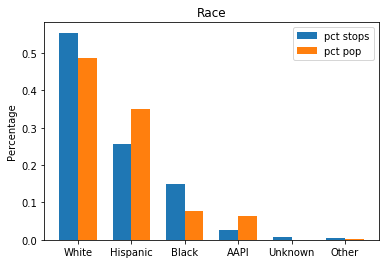

In [18]:
#There is probably a much better way to do this, but here we go

# convert value count to a list, so that we can do a grouped bar chart
stop_vector  = df['subject_race'].value_counts(normalize = 'true').tolist()

#Just to debug. 99% of debugging is just printing stuff out and seeing if it does what you want^(TM)
stop_vector

# 
labels = ['White', 'Hispanic', 'Black', 'AAPI', 'Unknown', 'Other']

#Enter in a vector (0,1) that match the labels. Ex: White people are 48.7%, so put 0.487 as the first entry, then the Hispanic number, etc. 
population_vector = [ 0.487, 0.351, 0.077, 0.063, 0, 0.002 ]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, stop_vector, width, label='pct stops')
rects2 = ax.bar(x + width/2, population_vector, width, label='pct pop')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Race')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()





In [19]:

##notice that my range for the for loop is the length of the vector

for i in range(len(stop_vector)):
    difference = stop_vector[i]-population_vector[i]
    print( 'The difference for ' + labels[i] + ' is ' + str(100*difference) + '%' )

The difference for White is 6.769495274731874%
The difference for Hispanic is -9.45235787465365%
The difference for Black is 7.266073671555066%
The difference for AAPI is -3.5753402462064385%
The difference for Unknown is 0.6487285128079908%
The difference for Other is 0.3434006617651623%


In [ ]:
#  Question: How much more likely are black motorists to be pulled over than everyone else? (Remember: odds = p/(1-p))


In [ ]:
# let's run some linear models....no worries if you don't understand any of this

##The type of linear regression we will be doing is called regression using dummy variables. 
## Here each Beta refers to a specific race, for example, Beta1 could equal 0 if the stop is a Hispanic person and zero otherwise, and so on and so on... 



## make a data frame out of dummy variables

just_dummies = pd.get_dummies(df.subject_race)
just_dummies


In [ ]:
##Bind dummy variables back with the original data set

df_with_dummies = pd.concat([df, just_dummies], axis=1)


df_with_dummies.head()

# This is how you can run regression using categorical variables. This isn't a great idea if you have a lot of categorical outcomes in one
#column, as it will create that many more columns.


x2 = ['subject_race']
y2 = ['frisk performed']

x = sm.add_constant(x2)
results = sm.OLS(y2,x).fit()
results.summary()

In [ ]:
#age is a (somewhat) continuous variable, so it's a little easier

regr = LinearRegression()


##You only need to do this if "NA" not available values need to be removed, as they often do with these sorts of datasets

df_drop = df.dropna(subset = ['subject_age'])


# specify input variable

x1 = df_drop['subject_age']

#specify output variable


y = df_drop['search_vehicle']

results = sm.OLS(y,x1).fit()
results.summary()